<a href="https://colab.research.google.com/github/alfonso-uacj/ColabFiles/blob/main/Pr%C3%A1ctica_21_Ejercicios_con_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Realizar un EDA completo, incluyendo:

Descripción de los datos.

Histogramas para las columnas numéricas.

Gráficas de barras para la columna categórica status (supervivencia).

Boxplots para identificar outliers en las columnas numéricas.

Matriz de correlación y mapa de calor.

Pairplot para visualizar relaciones entre variables numéricas.

Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas.

# Descripción de los datos.

In [8]:
import pandas as pd

# Definir nombres de columnas

column_names = ['age', 'year', 'nodes', 'survival_status']

# Cargar el archivo
file = '/content/drive/MyDrive/ClassFiles/haberman.data'
df = pd.read_csv(file, header=None, names=column_names)


#  tipos de datos
print("Tipo de datos")
print(df.dtypes)

# Datos
print("\nDatos y filas ")
print(df)



Tipo de datos
age                int64
year               int64
nodes              int64
survival_status    int64
dtype: object

Datos y filas 
     age  year  nodes  survival_status
0     30    64      1                1
1     30    62      3                1
2     30    65      0                1
3     31    59      2                1
4     31    65      4                1
..   ...   ...    ...              ...
301   75    62      1                1
302   76    67      0                1
303   77    65      3                1
304   78    65      1                2
305   83    58      2                2

[306 rows x 4 columns]


# Histogramas para las columnas numéricas

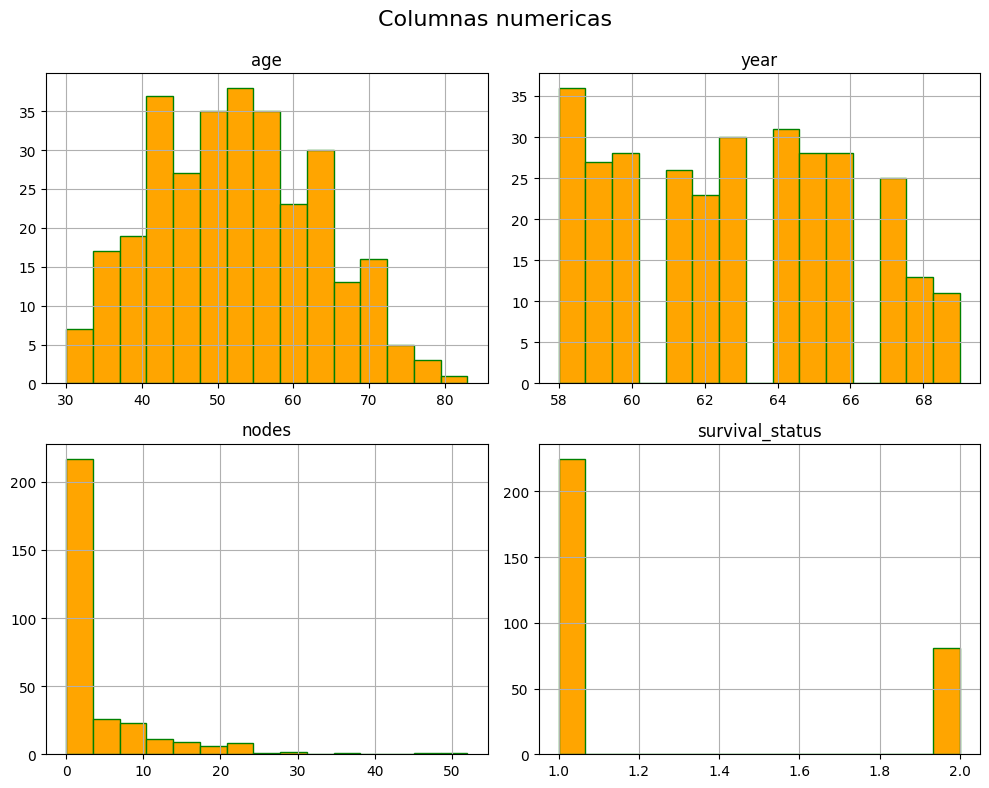

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir nombres de columnas
column_names = ['age', 'year', 'nodes', 'survival_status']

# Cargar el archivo
file = '/content/drive/MyDrive/ClassFiles/haberman.data'
df = pd.read_csv(file, header=None, names=column_names)

# histogramas
df.hist(figsize=(10, 8), bins=15, edgecolor='green', color='orange')

# gRaficar
plt.suptitle('Columnas numericas', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Ajustar para dejar espacio al título
plt.show()

# Gráficas de barras para la columna categórica status (supervivencia).

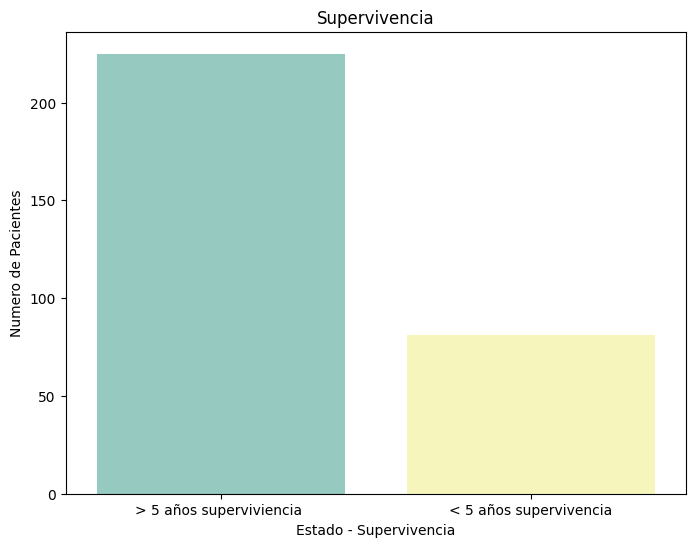

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir nombres de columnas
column_names = ['age', 'year', 'nodes', 'survival_status']

# Cargar el archivo
file = '/content/drive/MyDrive/ClassFiles/haberman.data'
df = pd.read_csv(file, header=None, names=column_names)


# Etiquetas segun coinci
df['survival_status'] = df['survival_status'].map({1: '> 5 años superviviencia ', 2: '< 5 años supervivencia'})

# Crear gráfica de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='survival_status', hue='survival_status', palette='Set3')
plt.title('Supervivencia')
plt.xlabel('Estado - Supervivencia')
plt.ylabel('Numero de Pacientes')
plt.show()

# Boxplots para identificar outliers en las columnas numéricas.

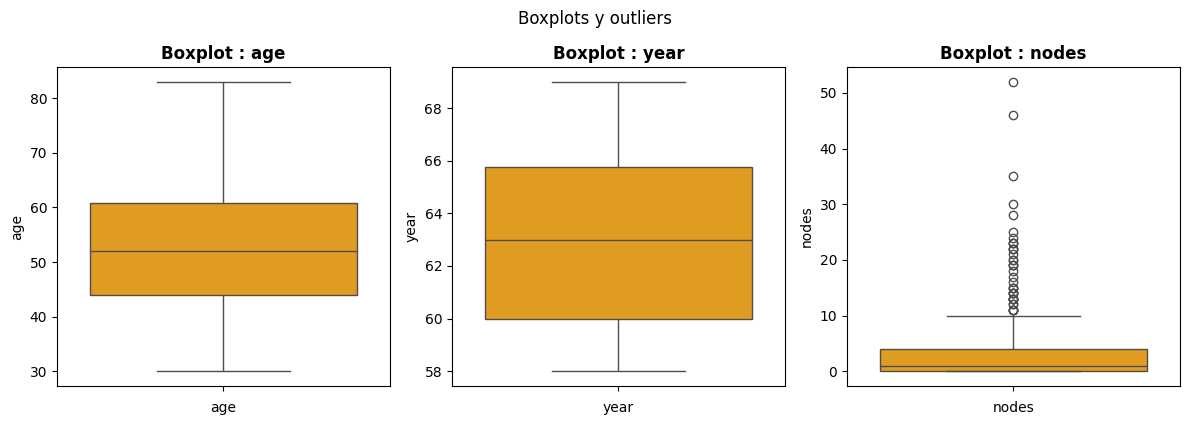

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir nombres de columnas
column_names = ['age', 'year', 'nodes', 'survival_status']

# Cargar el archivo
file = '/content/drive/MyDrive/ClassFiles/haberman.data'
df = pd.read_csv(file, header=None, names=column_names)

numericos = ['age', 'year', 'nodes']  # segun la exploracion estos fueron numericos

# grafico
plt.figure(figsize=(12, 4))

# Crear un boxplot para cada columna
for i, col in enumerate(numericos, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Boxplot : {col}', fontweight='bold')
    plt.xlabel(col)

plt.tight_layout()
plt.suptitle('Boxplots y outliers', fontsize=12, y=1.05)
plt.show()

# Matriz de correlación y mapa de calor.

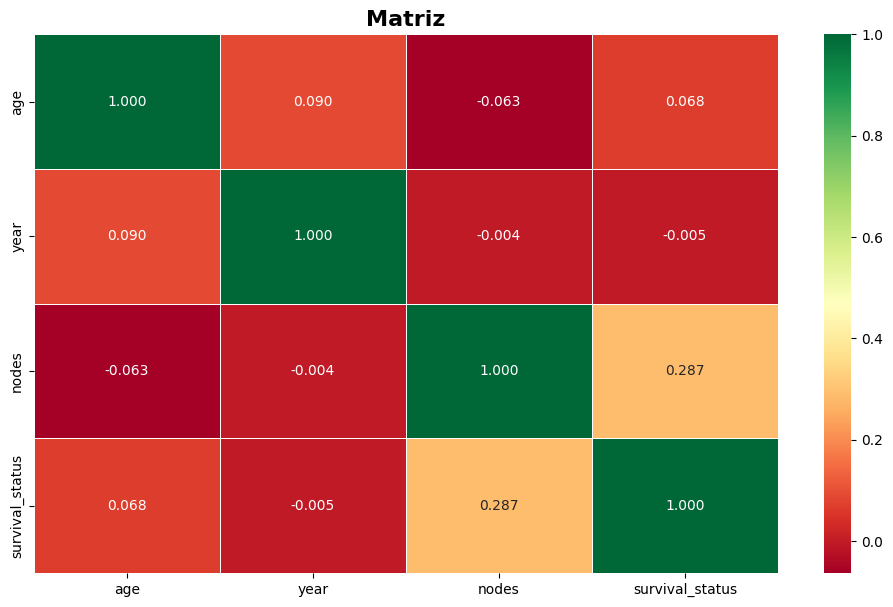

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir nombres de columnas
column_names = ['age', 'year', 'nodes', 'survival_status']

# Cargar el archivo
file = '/content/drive/MyDrive/ClassFiles/haberman.data'
df = pd.read_csv(file, header=None, names=column_names)

# matriz de correlación con .corr()
corr = df.corr()

# Figura
plt.figure(figsize=(12, 7))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="RdYlGn", linewidths=0.5)
plt.title("Matriz", fontsize=16, fontweight='bold')
plt.show()

# Pairplot para visualizar relaciones entre variables numéricas

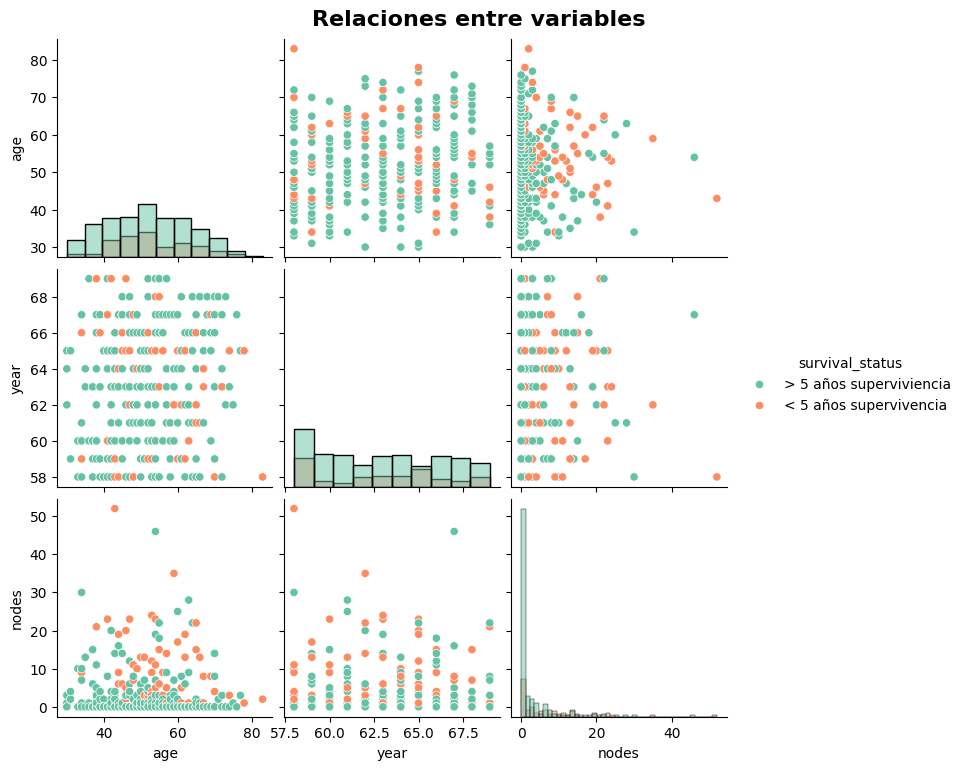

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Definir nombres de columnas
column_names = ['age', 'year', 'nodes', 'survival_status']

# Cargar el archivo
file = '/content/drive/MyDrive/ClassFiles/haberman.data'
df = pd.read_csv(file, header=None, names=column_names)

# Convertir survival_status en etiquetas
df['survival_status'] = df['survival_status'].map({1: '> 5 años superviviencia ', 2: '< 5 años supervivencia'})

# Grafico
sns.pairplot(df, hue='survival_status', diag_kind='hist', palette='Set2')
plt.suptitle('Relaciones entre variables', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas.

/usr/local/lib/python3.11/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


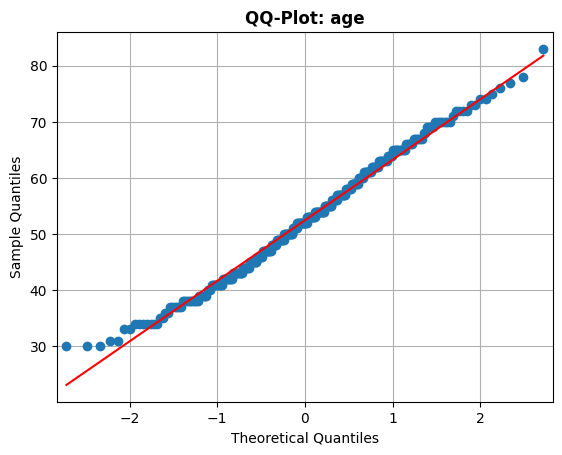

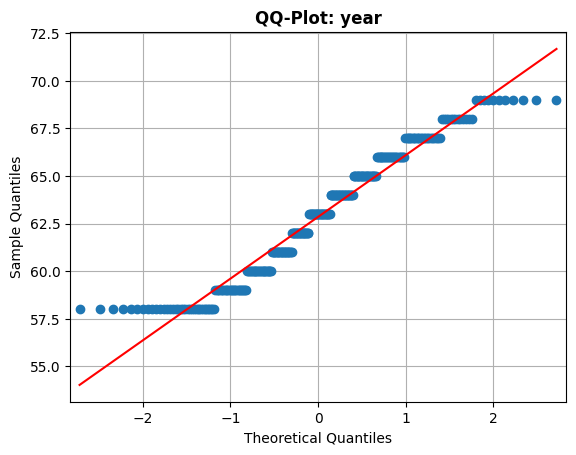

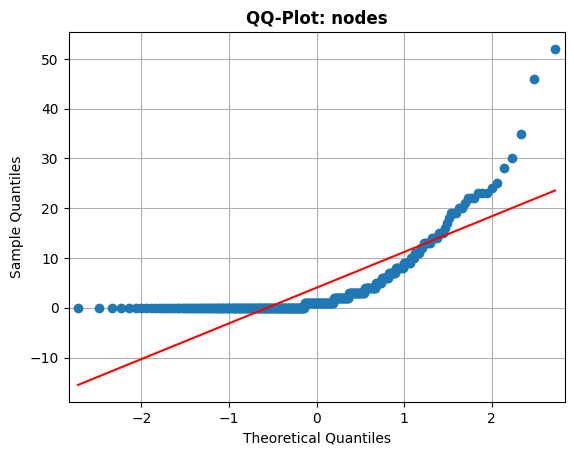

In [40]:
import pandas as pd
from scipy.stats import shapiro, anderson, kstest
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Definir nombres de columnas
column_names = ['age', 'year', 'nodes', 'survival_status']

# Cargar el archivo
file = '/content/drive/MyDrive/ClassFiles/haberman.data'
df = pd.read_csv(file, header=None, names=column_names)

# Columnas
numeric_cols = ['age', 'year', 'nodes']

for col in numeric_cols:
    data = df[col]

    # Generar QQ-Plot
    sm.qqplot(data, line='s', color='orange')
    plt.title(f'QQ-Plot: {col}', fontweight='bold')
    plt.grid(True)
    plt.show()
